# Elements Of Data Processing (2020S2) - Week 6


# Visualization with Python

In these exercises you will:

- learn how to visualize a set of data using a Python library called `matplotlib`.
- find out different forms of visualization, such as bar charts, histograms, scatter plot, and boxplot.

You will be able to transform a set of data into an appropriate visualization form.

`matplotlib` is a Python 2D plotting library that enables you to produce figures and charts, both in a screen or in an image file. 

The following example demonstrates a simple plot of the top 100 emissions in 2010, using the emmisions dataset seen in previous labs. 


In [1]:
# create a new DataFrame for the CO2 emission from a csv file
import pandas as pd
emission = pd.read_csv('data/emission.csv',encoding = 'ISO-8859-1')
yr2010 = emission['2010']
names  = emission['Country']
yr2010.index = names
yr2010_sorted = yr2010.sort_values(ascending = False)
top100_yr2010 = yr2010_sorted[0:100]


{'whiskers': [<matplotlib.lines.Line2D at 0x1d7e0ccd9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7e0ccde10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7e0ccd5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7e0ce8748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7e0ce8a90>],
 'means': []}

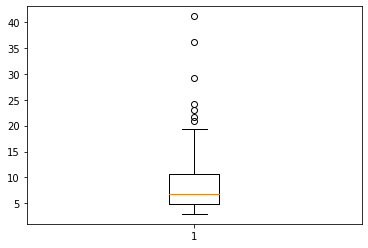

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(top100_yr2010) # a boxplot of the top 100 emissions in year 2020

## Scatter plot


Scatter plot is often used to display the relationship between two variables (plot as x-y pairs). In this scatter plot example, we use [famous Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). The data is available [here](data/iris.csv). This data set provides measurements on various parts of three types of Iris flower (Iris setosa, Iris versicolour, and Iris virginica). For each type, there are 50 measurements, or samples. Each data row in the CSV file contains (1) petal width, (2) sepal width, (3) petal length, (4) sepal length, and (5) the type of Iris flower.

The following code generates the scatter plot between petal length and petal width of the three Iris types.

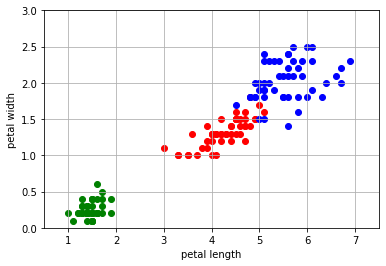

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

iris=pd.read_csv('data/iris.csv',encoding = 'ISO-8859-1')
setosa=iris.loc[iris['Name']=='Iris-setosa']
versicolor=iris.loc[iris['Name']=='Iris-versicolor']
virginica=iris.loc[iris['Name']=='Iris-virginica']


plt.scatter(setosa.iloc[:,2],setosa.iloc[:,0],color='green')
plt.scatter(versicolor.iloc[:,2],versicolor.iloc[:,0],color='red')
plt.scatter(virginica.iloc[:,2],virginica.iloc[:,0],color='blue')
plt.xlim(0.5,7.5)
plt.ylim(0,3)
plt.ylabel("petal width")
plt.xlabel("petal length")
plt.grid(True)



From the scatter plot, we may be able to suggest a particular type of relationship or a formation of clusters. In the example above you may notice that, for Iris versicolor, the samples with longer petal tend to have wider petal. You can also see clearly that there exist clusters of these three Irises. As such, the measurements of petal and sepal can help identifying the type of Iris flower. This example demonstrates how botanists may indentify a certain species from phenotype characteristics.

### <span style="color:blue"> Exercise 1 </span> 


Modify the example above to generate the scatter plot of sepal length and petal width.


In [ ]:
##answer here





## Bar chart

Bar chart is probably the most common type of chart. It displays a property or properties of a set of different entities. Bar chart is typically used to provide comparison, or to show contrast between different entities. For example, the bar chart below displays the GNP per capita of the three poorest and the three richest countries in the world (based on 2004 GNP per capita):

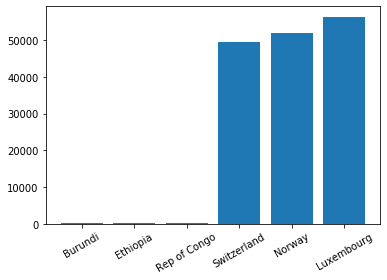

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

countries = ['Burundi','Ethiopia','Rep of Congo','Switzerland','Norway','Luxembourg']
gnp = [90,110,110,49600,51810,56380] # GNP per capita (2004)
plt.bar(arange(len(gnp)),gnp)
plt.xticks( arange(len(countries)),countries, rotation=30)
plt.show()

### <span style="color:blue"> Exercise 2 </span> 


Modify the bar chart example to plot the average maximum temperature in all major Australian cities. The data is available [here](data/max_temp.csv). 


In [ ]:
##answer here





In a clustered bar chart, you can display a few measurements from the entities of interest. For example, the clustered bar chart below simultaneously shows the number of births and deaths in four countries of interest. The number of births is displayed as the blue-colored bar and the number of deaths as the red-colored bar:

([<matplotlib.axis.XTick at 0x1f06eea10f0>,
 <a list of 4 Text xticklabel objects>)

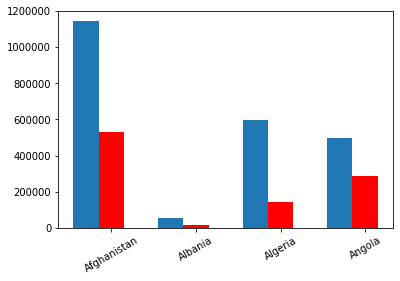

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola']
births = [1143717, 53367, 598519, 498887]
deaths = [529623, 16474, 144694, 285380]
plt.bar(arange(len(births))-0.3, births, width=0.3)
plt.bar(arange(len(deaths)),deaths, width=0.3,color='r')
plt.xticks(arange(len(countries)),countries, rotation=30)

### Parallel co-ordinates

Parallel co-ordinates is another method for data visualisation.  Each data instance is represented by a line and each feature by a vertical bar.   Similar objects can be identified by the similarity of their lines.   Correlations between (adjacent) features can also be identified.

The following dataset "Auto MPG" [(this file)](data/mpg.csv) is a classic dataset providing detail about different models of cars in the 1970s and 1980s.  It uses features such as number of cylinders, horsepower, weight, ..., miles per gallon

Explain the logic of the code, normalising and not colouring

No handles with labels found to put in legend.


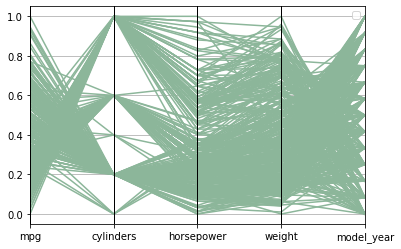

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data=pd.read_csv('data/mpg.csv',encoding = 'ISO-8859-1')




##normalise data
data['mpg'] = (data['mpg']-data['mpg'].min())/(data['mpg'].max()-data['mpg'].min())
data['weight'] = (data['weight']-data['weight'].min())/(data['weight'].max()-data['weight'].min())
data['cylinders'] = (data['cylinders']-data['cylinders'].min())/(data['cylinders'].max()-data['cylinders'].min())
data['horsepower'] = (data['horsepower']-data['horsepower'].min())/(data['horsepower'].max()-data['horsepower'].min())
data['model_year'] = (data['model_year']-data['model_year'].min())/(data['model_year'].max()-data['model_year'].min())

###Set 'name' to be empty since it is a string.   'name' is  the class feature used to color the objects, but for this
## case we just want all objects to be the same colour, hence we make it empty.  More generally, one can use a categorical
##feature to determine the line colors.  

data['name']=''

###plot in parallel co-ordinates
#a document showing the parallel-coordinates API is at
#https://groups.google.com/forum/#!topic/glue-viz/5-ljzYj4Qnc

parallel_coordinates(data[['mpg','cylinders','horsepower','weight','model_year','name']],'name')
plt.show()


### <span style="color:blue"> Exercise 3 </span> 

Consider this parallel co-ordinates plot above.  What insights can obtain from this plot?    To make it easier to visualise, you may like to display fewer car_models (objects) altering the code above and using pandas.DataFrame.sample(...) 


### <span style="color:blue"> Exercise 3 answer </span> 


In [ ]:
###Answer 3


### <span style="color:blue"> Exercise 4 </span> 
Select car models with years in the range 1980-1982 and make them green in the parallel co-ordinates plot.  Colour all others car models red.  This technique is called "brushing", since it is used to make a particular subset of the objects stand out.   What do you notice?

In [1]:
###Exercise 4 answer



## VAT - visualising clustering tendency

In the lecture we discussed visualising clustering tendency of a dataset. One way of the doing this by employing the VAT algorithm. Below is python code for VAT.  You can treat it as a black box (not worrying about the internal coding details) - a function which can be used to execute VAT on an input dataset.



In [29]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




### Visualising iris datset using VAT

We will first recreate the visualisations of the iris dataset used in lectures.   Info about the iris dataset is [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).  

First a heatmap of the raw iris dataset is displayed.  

Secondly a randomly ordered dissimilarity matrix for the objects in iris is shown - notice the lack of structure.   

Thirdly the VAT visualisation is produced.  The heatmap function from the seaborn package is employed as a convenient tool for plotting heatmaps.

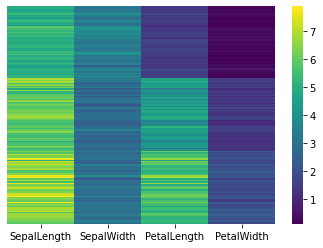

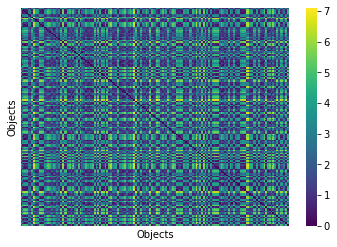

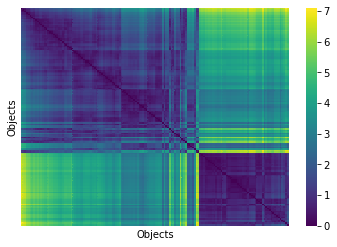

In [30]:
import seaborn as sns

##########################################################
#######Read in the datset###############
##########################################################
iris= pd.read_csv('data/iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns

####Draw heatmap of raw Iris matrix#######j
sns.heatmap(iris2,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()



####Visualise the dissimilarity matrix for Iris using a heatmap (without applying VAT)####
iris3=iris2.copy().values
np.random.shuffle(iris3)   ####randomise the order of rows (objects)
sq = squareform(pdist(iris3))   ###commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()



#####Apply VAT Algorithm to Iris dataset and visualise using heatmap########
RV, C, I = VAT(iris2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

### <span style="color:blue"> Exercise 5a </span> 
How many clusters does the VAT visualisation reveal?   Is this what you were expecting given the wikipedia description of this dataset?


### Practicing VAT

You will now practice using the australian crabs dataset from [this file](data/australian-crabs.csv).   This data describes 200 crabs collected from Fremantle Western Australia.   There are two species of crabs - blue and orange.   Within each species there are male and female.   

There are 5 features:

FL - frontal lip
RW - rear width
CL - carapace length
CW - carapace width
BD - body depth

The first four of these are visualised as follows:

<img src="crabsimage.png" width=300/>


### <span style="color:blue"> Exercise 5b </span> 

Adapt the iris example to produce a VAT heatmap of the australian crabs dataset.   How many clusters are there?


In [28]:
###Answer 5b

